In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/game-recommendations-on-steam/games_metadata.json
/kaggle/input/game-recommendations-on-steam/users.csv
/kaggle/input/game-recommendations-on-steam/games.csv
/kaggle/input/game-recommendations-on-steam/recommendations.csv


In [101]:
from matplotlib import pyplot as plt

In [102]:
# Vamos a cargar las bases de datos de los juegos
df = pd.read_csv('/kaggle/input/game-recommendations-on-steam/games.csv')
df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,223850,3DMark,2010-12-07,True,False,False,Very Positive,93,11573,34.99,34.99,0.0,False
48840,1268750,Starship Troopers: Extermination,2023-05-17,True,False,False,Very Positive,93,10330,24.99,24.99,0.0,True
48841,2005010,Warhammer 40000: Boltgun,2023-05-23,True,False,False,Overwhelmingly Positive,95,2660,19.79,21.99,10.0,True
48842,1304930,The Outlast Trials,2023-05-18,True,False,False,Very Positive,94,11155,29.99,29.99,0.0,True


In [103]:
#Mostramos info de df juegos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48844 entries, 0 to 48843
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          48844 non-null  int64  
 1   title           48844 non-null  object 
 2   date_release    48844 non-null  object 
 3   win             48844 non-null  bool   
 4   mac             48844 non-null  bool   
 5   linux           48844 non-null  bool   
 6   rating          48844 non-null  object 
 7   positive_ratio  48844 non-null  int64  
 8   user_reviews    48844 non-null  int64  
 9   price_final     48844 non-null  float64
 10  price_original  48844 non-null  float64
 11  discount        48844 non-null  float64
 12  steam_deck      48844 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.5+ MB


In [104]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True


/tmp/ipykernel_32/3581803363.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame


<Axes: title={'center': 'Pearson'}>

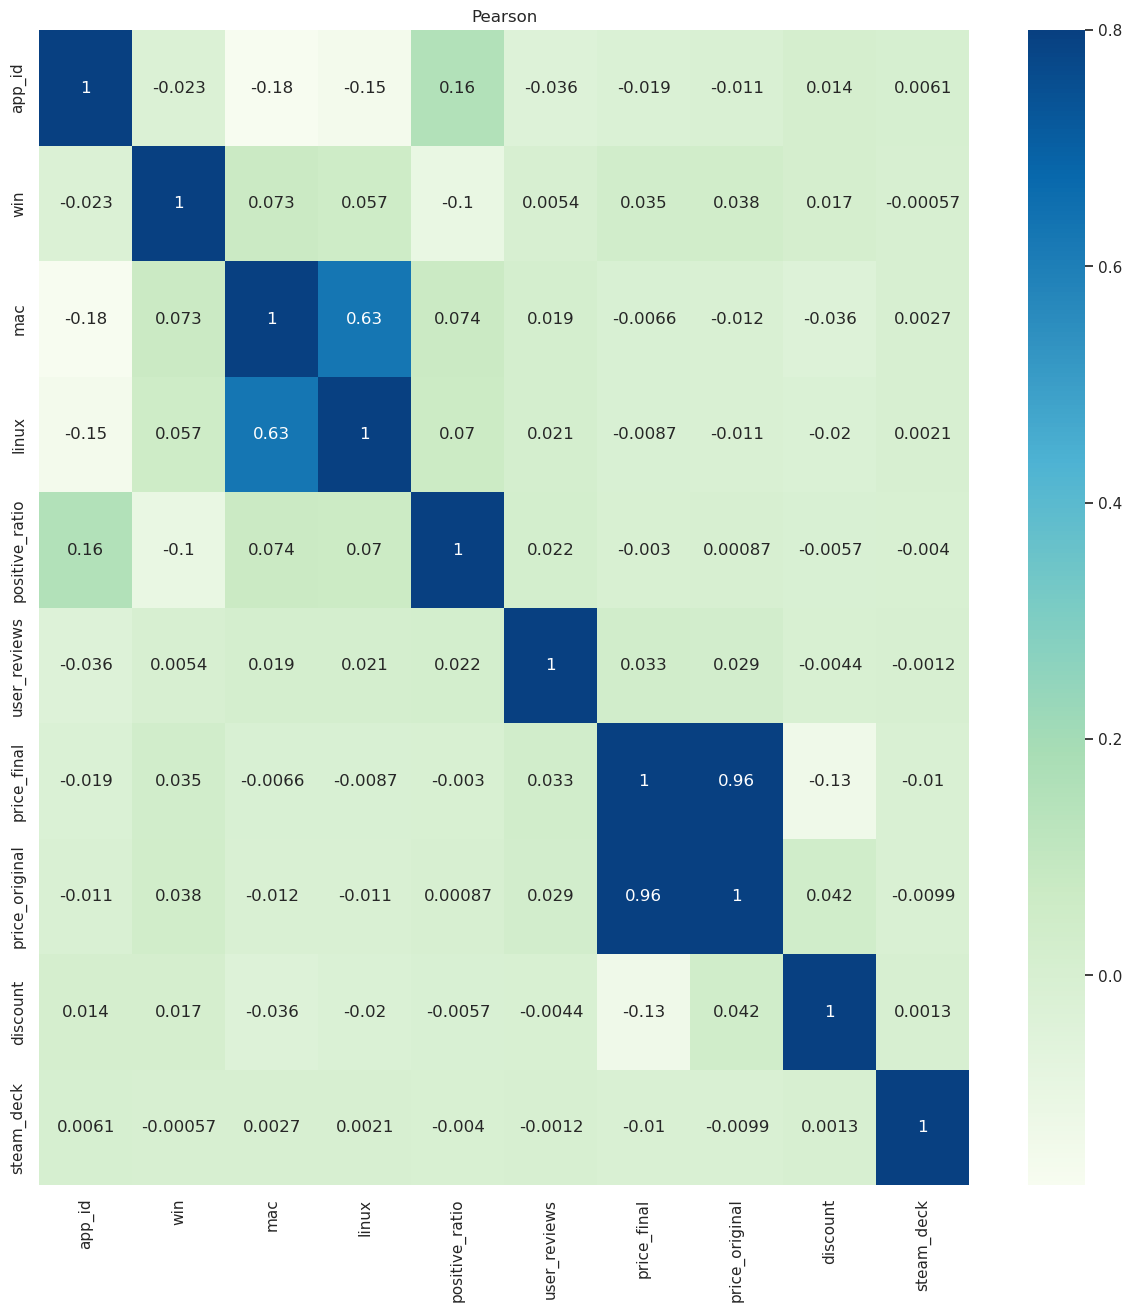

In [105]:
#Grafica de Pearson para la base de datos de juegos
import seaborn as sns  # Importa la biblioteca seaborn para visualización de datos avanzada
sns.set(style='whitegrid', font_scale=1)  # Configura el estilo de gráfico y el tamaño de la fuente
plt.figure(figsize=(15, 15))  # Crea una figura de matplotlib con un tamaño específico
plt.title('Pearson')  # Establece el título del gráfico como 'Pearson'
sns.heatmap(df.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame

In [106]:
# Vamos a cargar las bases de datos de recomendados
rc = pd.read_csv('/kaggle/input/game-recommendations-on-steam/recommendations.csv')
rc

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,24170,0
1,304390,4,0,2017-02-17,False,11.5,1339,1
2,1085660,2,0,2019-11-17,True,336.5,110271,2
3,703080,0,0,2022-09-23,True,27.4,112510,3
4,526870,0,0,2021-01-10,True,7.9,11046,4
...,...,...,...,...,...,...,...,...
14585286,1158310,0,0,2020-11-25,True,275.0,5783912,14585286
14585287,271590,0,0,2020-07-03,True,134.3,15538,14585287
14585288,976730,0,0,2020-03-07,True,16.4,282978,14585288
14585289,1158310,0,0,2020-11-25,True,103.8,2942944,14585289


In [107]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585291 entries, 0 to 14585290
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7   review_id       int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 792.8+ MB


In [108]:
rc.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,24170,0
1,304390,4,0,2017-02-17,False,11.5,1339,1
2,1085660,2,0,2019-11-17,True,336.5,110271,2
3,703080,0,0,2022-09-23,True,27.4,112510,3
4,526870,0,0,2021-01-10,True,7.9,11046,4


/tmp/ipykernel_32/2678360359.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rc.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame rc


<Axes: title={'center': 'Pearson'}>

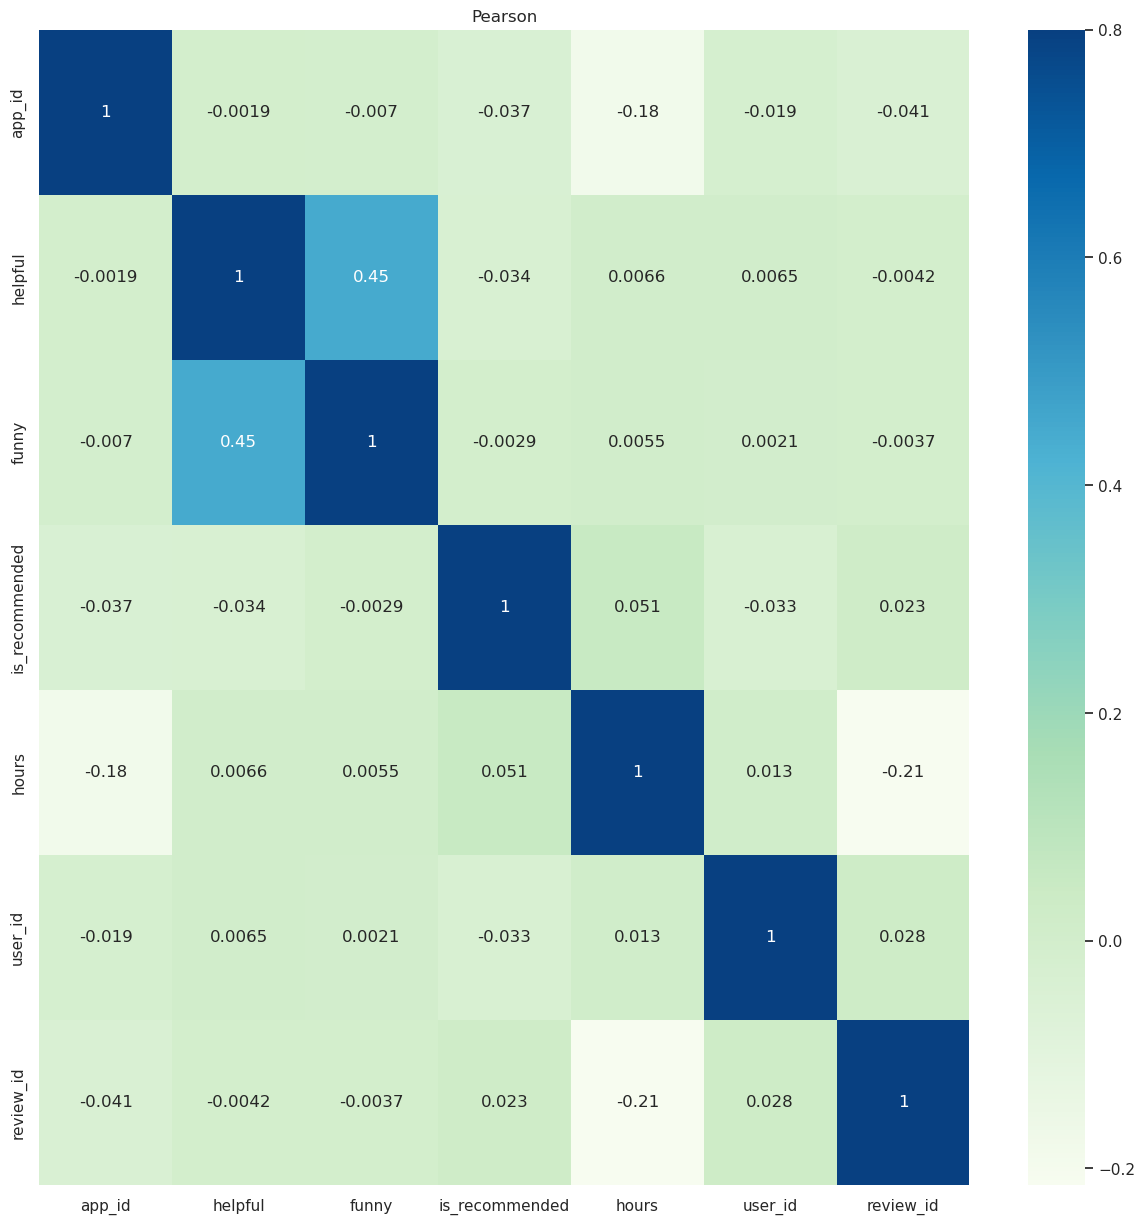

In [109]:
import seaborn as sns  # Importa la biblioteca seaborn para visualización de datos avanzada
sns.set(style='whitegrid', font_scale=1)  # Configura el estilo de gráfico y el tamaño de la fuente
plt.figure(figsize=(15, 15))  # Crea una figura de matplotlib con un tamaño específico
plt.title('Pearson')  # Establece el título del gráfico como 'Pearson'
sns.heatmap(rc.corr(), vmax=0.8, cmap='GnBu', annot=True)  # Crea un mapa de calor de la matriz de correlación del DataFrame rc


In [110]:
# Crea un DataFrame con dos filas y dos columnas
pd.DataFrame([
    ["Recomendas", len(rc.index)],
    ["Juegos", len(df.index)],
], 
columns=["Base_Dados", "Registos"]).style.hide_index() # Aplica estilo para ocultar los índices


/tmp/ipykernel_32/566318494.py:6: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  columns=["Base_Dados", "Registos"]).style.hide_index() # Aplica estilo para ocultar los índices


Base_Dados,Registos
Recomendas,14585291
Juegos,48844


In [111]:
print(df.isnull().sum()) #imprime la cantidad de valores nulos en cada columna

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


In [112]:
print(df.dtypes)

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


In [113]:
print(rc.isnull().sum()) #imprime la cantidad de valores nulos en cada columna

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


In [114]:
print(rc.dtypes)

app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object


In [115]:
#identifica y muestra los valores duplicados en la columna
duplicated_app_ids = rc['review_id'][rc['review_id'].duplicated()]
print(duplicated_app_ids)
duplicated_app_ids = df['app_id'][df['app_id'].duplicated()]
print(duplicated_app_ids)

Series([], Name: review_id, dtype: int64)
Series([], Name: app_id, dtype: int64)


In [116]:
## Verifique el valor mínimo y máximo en la columna 'price_final' de DataFrame 'games'
print(df['price_final'].min(), df['price_final'].max())

0.0 299.99


In [117]:
def perc_na(df: pd.DataFrame) -> float:
    """Calculates a percentage of missing values in the dataframe."""
    return np.count_nonzero(df.isnull().values) / (df.shape[0] * df.shape[1]) * 100.0


pd.DataFrame([
    ["Recommendacion", perc_na(rc)],
    ["Juegos", perc_na(df)],
    ["Metadata",perc_na(metadata)]
], columns=["Dataframe", "% of missing values"])

,Dataframe,% of missing values
0,Recommendacion,0.0
1,Juegos,0.0
2,Metadata,0.0


In [118]:
df[["positive_ratio", "user_reviews", "price_final", "discount"]].describe(percentiles=[.1, .25, .5, .75, .9]).round(0).T


,count,mean,std,min,10%,25%,50%,75%,90%,max
positive_ratio,48844.0,77.0,18.0,0.0,50.0,66.0,81.0,91.0,96.0,100.0
user_reviews,48844.0,1752.0,37963.0,10.0,12.0,20.0,50.0,213.0,1112.0,6941137.0
price_final,48844.0,9.0,12.0,0.0,0.0,1.0,5.0,12.0,20.0,300.0
discount,48844.0,5.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0


In [119]:
rc[["helpful", "funny", "hours"]].describe(percentiles=[.1, .25, .5, .75, .9]).round(1).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
helpful,14585291.0,3.3,56.3,0.0,0.0,0.0,0.0,0.0,3.0,36212.0
funny,14585291.0,1.1,38.0,0.0,0.0,0.0,0.0,0.0,0.0,28088.0
hours,14585291.0,139.1,202.6,0.0,5.2,15.6,50.8,164.9,424.8,999.9


In [120]:
metadata = pd.read_json('/kaggle/input/game-recommendations-on-steam/games_metadata.json', lines=True)

In [121]:
metadata.head()

,app_id,description,tags
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti..."
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
2,22364,,[Action]
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."


In [122]:
print(metadata.isnull().sum())

app_id         0
description    0
tags           0
dtype: int64


In [123]:
print(metadata.dtypes)

app_id          int64
description    object
tags           object
dtype: object


In [124]:

juegosdf = df.merge(metadata, on='app_id')

relevant_cols = ['app_id', 'title', 'positive_ratio', 'user_reviews', 'tags']
juegosdf = juegosdf[relevant_cols]

juegosdf = juegosdf.sort_values(by = 'user_reviews', ascending = False)
juegosdf = juegosdf.head(100)
review_avg = juegosdf['user_reviews'].mean()

Tamaño Serie  246
Generos Comunes Prom  8.130081300813009


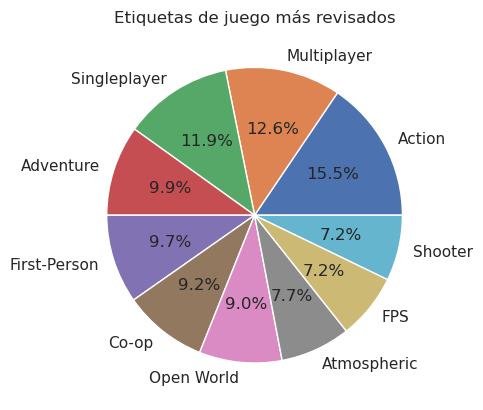

In [125]:
gengraf = juegosdf['tags']
count_list = []
for i in gengraf:
    for j in i:
        count_list.append(j)

gen_clasif = pd.value_counts(np.array(count_list))
gen_clasif = gen_clasif.sort_values(ascending=False)
print("Tamaño Serie ", gen_clasif.size)
print("Generos Comunes Prom ", gen_clasif.mean())


genero = gen_clasif.head(10)
labels = genero.keys()

fig, ax = plt.subplots()
plt.title('Etiquetas de juego más revisados')
pchart = ax.pie(genero, labels = labels, autopct='%1.1f%%')

Tamaño de la serie: 108
Promedio de géneros comunes: 1.8518518518518519


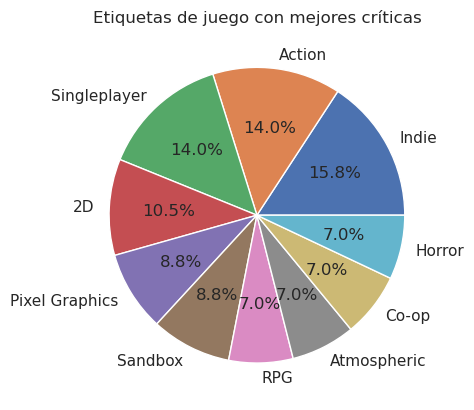

In [126]:
from matplotlib import pyplot as plt

positivedf = juegosdf.sort_values('positive_ratio', ascending=False).head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Tamaño de la serie:", sorted_tags.size)
print("Promedio de géneros comunes:", sorted_tags.mean())

tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
plt.title('Etiquetas de juego con mejores críticas')
pchart = ax.pie(tag_slice, labels=labels, autopct='%1.1f%%')


In [127]:
for tags in metadata['tags'].explode().unique():
    if tags is not np.nan:
        metadata[tags] = metadata['tags'].apply(lambda x: tags in x)

/tmp/ipykernel_32/2677081229.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata[tags] = metadata['tags'].apply(lambda x: tags in x)
/tmp/ipykernel_32/2677081229.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metadata[tags] = metadata['tags'].apply(lambda x: tags in x)
/tmp/ipykernel_32/2677081229.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

In [128]:
metadata.info

<bound method DataFrame.info of         app_id                                        description  \
0        10090  Call of Duty is back, redefining war like you'...   
1        13500  Enter the dark underworld of Prince of Persia ...   
2        22364                                                      
3       113020  Monaco: What's Yours Is Mine is a single playe...   
4       226560  Escape Dead Island is a Survival-Mystery adven...   
...        ...                                                ...   
48839   223850  3DMark is for gamers, overclockers and system ...   
48840  1268750  Starship Troopers: Extermination is a 16 playe...   
48841  2005010  Load up your Boltgun and unleash the awesome S...   
48842  1304930  Red Barrels invites you to experience mind-num...   
48843  1774580  The story of Cal Kestis continues in STAR WARS...   

                                                    tags  Zombies  \
0      [Zombies, World War II, FPS, Multiplayer, Acti...     True   
1

In [129]:
metadata.columns
metadata.shape
metadata.dtypes
metadata.describe()
metadata.info()
metadata.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48844 entries, 0 to 48843
Columns: 444 entries, app_id to Fox
dtypes: bool(441), int64(1), object(2)
memory usage: 21.7+ MB


,app_id,description,tags,Zombies,World War II,FPS,Multiplayer,Action,Shooter,Co-op,...,Reboot,Benchmark,Feature Film,Steam Machine,Hockey,8-bit Music,Rugby,Tile-Matching,Coding,Fox
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti...",True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,22364,,[Action],False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller...",False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ...",False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,261550,"A strategy/action RPG. Create a character, eng...","[Medieval, Strategy, Open World, RPG, War, Mul...",False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,271850,,"[Strategy, Simulation, Action, RTS, World War II]",False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [130]:
metadata.describe()

,app_id
count,4.884400e+04
mean,1.020229e+06
std,5.872417e+05
min,1.000000e+01
25%,5.151708e+05
50%,9.516050e+05
75%,1.472300e+06
max,2.419270e+06


In [131]:
metadata.dtypes

app_id            int64
description      object
tags             object
Zombies            bool
World War II       bool
                  ...  
8-bit Music        bool
Rugby              bool
Tile-Matching      bool
Coding             bool
Fox                bool
Length: 444, dtype: object

In [132]:
metadata.shape

(48844, 444)

In [133]:
metadata.columns

Index(['app_id', 'description', 'tags', 'Zombies', 'World War II', 'FPS',
       'Multiplayer', 'Action', 'Shooter', 'Co-op',
       ...
       'Reboot', 'Benchmark', 'Feature Film', 'Steam Machine', 'Hockey',
       '8-bit Music', 'Rugby', 'Tile-Matching', 'Coding', 'Fox'],
      dtype='object', length=444)

In [134]:
df.info

<bound method DataFrame.info of         app_id                              title date_release   win    mac  \
0        10090         Call of Duty: World at War   2008-11-18  True  False   
1        13500  Prince of Persia: Warrior Within™   2008-11-21  True  False   
2        22364            BRINK: Agents of Change   2011-08-03  True  False   
3       113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   
4       226560                 Escape Dead Island   2014-11-18  True  False   
...        ...                                ...          ...   ...    ...   
48839   223850                             3DMark   2010-12-07  True  False   
48840  1268750   Starship Troopers: Extermination   2023-05-17  True  False   
48841  2005010           Warhammer 40000: Boltgun   2023-05-23  True  False   
48842  1304930                 The Outlast Trials   2023-05-18  True  False   
48843  1774580          STAR WARS Jedi: Survivor™   2023-04-27  True  False   

       linux       

In [135]:
df.describe

<bound method NDFrame.describe of         app_id                              title date_release   win    mac  \
0        10090         Call of Duty: World at War   2008-11-18  True  False   
1        13500  Prince of Persia: Warrior Within™   2008-11-21  True  False   
2        22364            BRINK: Agents of Change   2011-08-03  True  False   
3       113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   
4       226560                 Escape Dead Island   2014-11-18  True  False   
...        ...                                ...          ...   ...    ...   
48839   223850                             3DMark   2010-12-07  True  False   
48840  1268750   Starship Troopers: Extermination   2023-05-17  True  False   
48841  2005010           Warhammer 40000: Boltgun   2023-05-23  True  False   
48842  1304930                 The Outlast Trials   2023-05-18  True  False   
48843  1774580          STAR WARS Jedi: Survivor™   2023-04-27  True  False   

       linux     

In [136]:
rc.describe

<bound method NDFrame.describe of            app_id  helpful  funny        date  is_recommended  hours  user_id  \
0          975370        0      0  2022-12-12            True   36.3    24170   
1          304390        4      0  2017-02-17           False   11.5     1339   
2         1085660        2      0  2019-11-17            True  336.5   110271   
3          703080        0      0  2022-09-23            True   27.4   112510   
4          526870        0      0  2021-01-10            True    7.9    11046   
...           ...      ...    ...         ...             ...    ...      ...   
14585286  1158310        0      0  2020-11-25            True  275.0  5783912   
14585287   271590        0      0  2020-07-03            True  134.3    15538   
14585288   976730        0      0  2020-03-07            True   16.4   282978   
14585289  1158310        0      0  2020-11-25            True  103.8  2942944   
14585290   489830        4      0  2016-10-29           False   86.4  11583

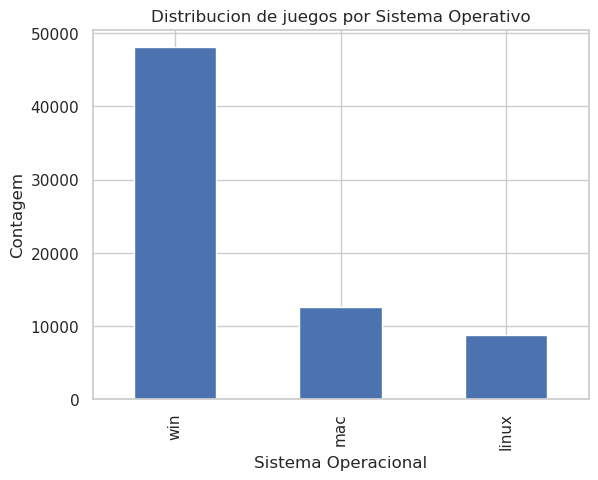

In [137]:
count_os = df[['win', 'mac', 'linux']].sum()

# Visualizacion en una grafica de barras
count_os.plot(kind='bar')
plt.xlabel('Sistema Operacional')
plt.ylabel('Contagem')
plt.title('Distribucion de juegos por Sistema Operativo')
plt.show()

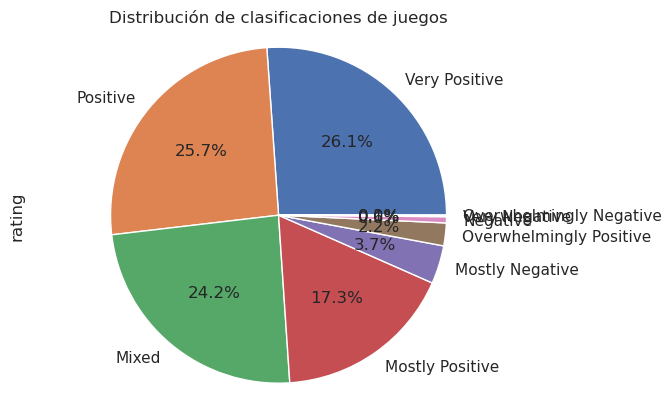

In [138]:
count_ratings = df['rating'].value_counts()


count_ratings.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribución de clasificaciones de juegos')
plt.show()

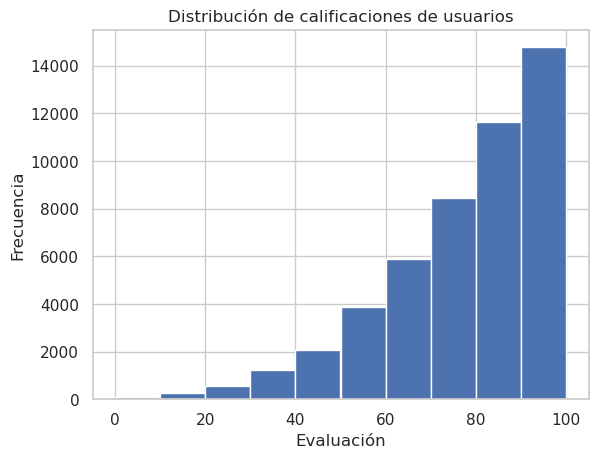

In [139]:
user_reviews_stats = df[['positive_ratio', 'user_reviews']].describe()

df['positive_ratio'].plot(kind='hist', bins=10)
plt.xlabel('Evaluación')
plt.ylabel('Frecuencia')
plt.title('Distribución de calificaciones de usuarios')
plt.show()

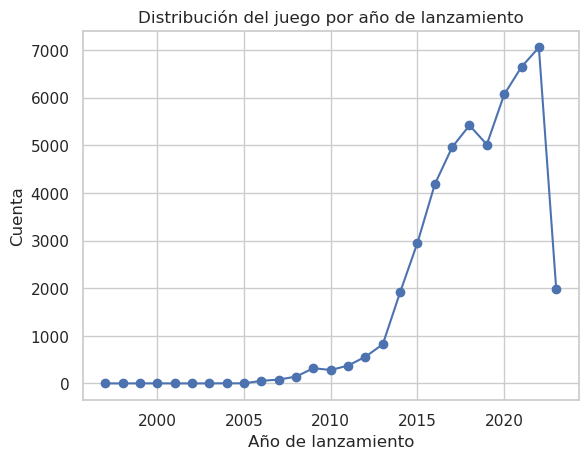

In [140]:
# Convertir la columna de data_release para escribir fecha y hora
df['date_release'] = pd.to_datetime(df['date_release'])

# Recuento de juegos por año de lanzamiento
count_release_year = df['date_release'].dt.year.value_counts().sort_index()

# Visualización en un gráfico de líneas
count_release_year.plot(kind='line', marker='o')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cuenta')
plt.title('Distribución del juego por año de lanzamiento')
plt.show()


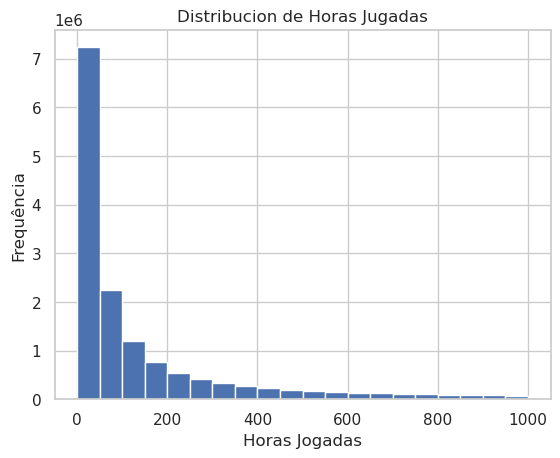

In [141]:
# Histograma de horas jugadas
rc['hours'].plot(kind='hist', bins=20)
plt.xlabel('Horas Jogadas')
plt.ylabel('Frequência')
plt.title('Distribucion de Horas Jugadas')
plt.show()

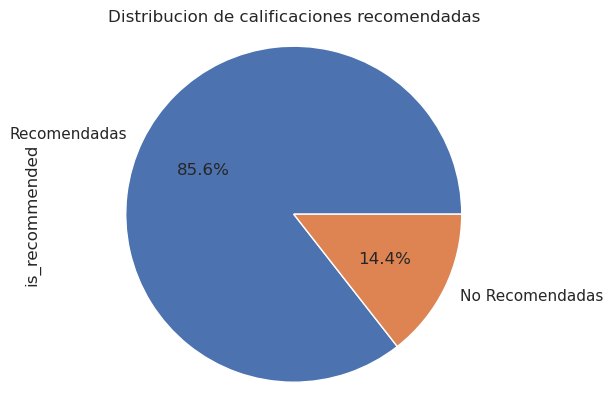

In [142]:
Recomendados = rc['is_recommended'].value_counts()

Recomendados.plot(kind='pie', autopct='%1.1f%%', labels = ['Recomendadas', 'No Recomendadas'])
plt.axis('equal')
plt.title('Distribucion de calificaciones recomendadas')
plt.show()

In [143]:

valores_sem_texto_descricao = metadata[metadata['description'].isna() | (metadata['description'] == '')]
valores_sem_texto_tags = metadata[metadata['tags'].isna() | (metadata['tags'] == '')]

print(valores_sem_texto_descricao)
print(valores_sem_texto_tags)

        app_id description                                               tags  \
2        22364                                                       [Action]   
9       271850              [Strategy, Simulation, Action, RTS, World War II]   
19      245950              [Action, RPG, FPS, Co-op, Shooter, Action RPG,...   
22      305181                                            [Adventure, Action]   
30      387440              [Action, Free to Play, MOBA, Third Person, Mul...   
...        ...         ...                                                ...   
48819  2358430                     [Action, Adventure, Massively Multiplayer]   
48822  2380030              [Strategy, Simulation, Grand Strategy, Space, ...   
48828  2311920                          [RPG, Strategy, Simulation, Medieval]   
48829  2218000                              [Action, Adventure, Free to Play]   
48834  1065400                 [Action, Adventure, Casual, Simulation, Indie]   

       Zombies  World War I

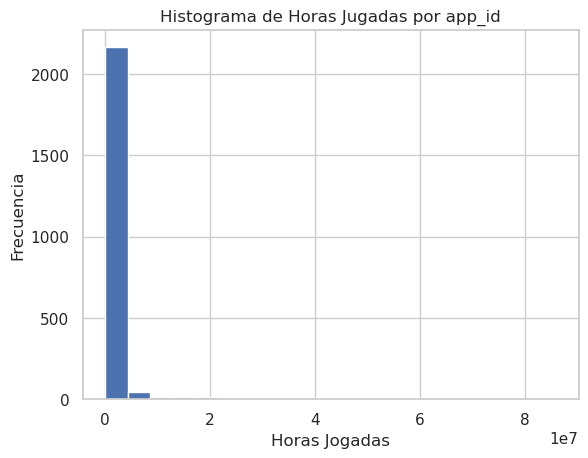

In [144]:
horas_por_app_id = rc.groupby('app_id')['hours'].sum()

#histograma
plt.hist(horas_por_app_id, bins=20)
plt.xlabel('Horas Jogadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Horas Jugadas por app_id')
plt.show()

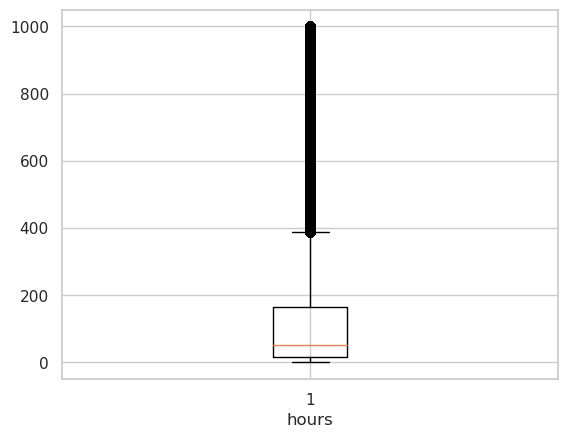

In [145]:
# Crea una figura y un eje
fig, ax = plt.subplots()

# Crea el diagrama de caja
ax.boxplot(rc['hours'])

# Definir etiqueta para el eje x
ax.set_xlabel('hours')

# Mostrar el gráfico
plt.show()

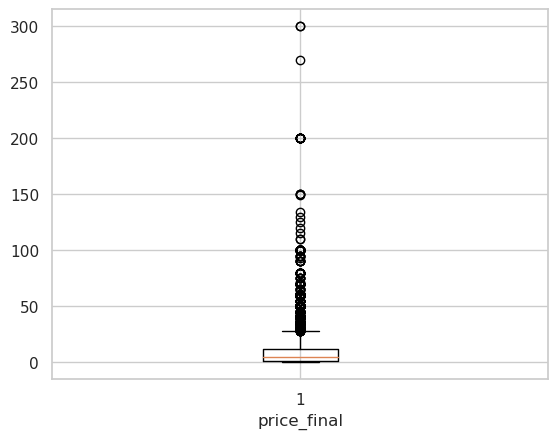

In [146]:
# Criar uma figura e um eixo
fig, ax = plt.subplots()

# Criar o boxplot
ax.boxplot(df['price_final'])

# Definir rótulo para o eixo x
ax.set_xlabel('price_final')

# Exibir o gráfico
plt.show()